# Run Any Kind of Logistic Regression (Binomial, Multinomial, etc.)

### Authors: Calvin Howard.

#### Last updated: March 16, 2024

Use this to run/test a statistical model on a spreadsheet.

Notes:
- To best use this notebook, you should be familar with GLM design and Contrast Matrix design. See this webpage to get started:
[FSL's GLM page](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/GLM)

# 00 - Import CSV with All Data
**The CSV is expected to be in this format**
- ID and absolute paths to niftis are critical
```
+-----+----------------------------+--------------+--------------+--------------+
| ID  | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

In [15]:
# %pip install seaborn --upgrade

Prep Output Directory

In [16]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/barotono_disease_classification/metadata/dataset_6'

Import Data

In [17]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/barotono_disease_classification/metadata/dataset_6/differential_diagnoses_train_jan10.csv'
sheet = None

In [18]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()
data_df

,DX,subid,AD,SV,LBD,BV,PNFA,CBS,PSP,CN,Peak_Values
0,AD,002_S_5018,0.267421,0.232926,0.183988,0.065369,0.002661,-0.046144,0.071820,0.055346,3.958120
1,AD,003_S_4136,0.250153,0.166423,0.281389,0.239407,-0.047390,-0.064591,0.075278,0.071814,6.707466
2,AD,003_S_4152,0.261028,-0.006894,0.240255,0.380777,0.341750,0.108512,0.148428,0.012038,4.700880
3,AD,003_S_4373,0.268129,0.105613,-0.066399,-0.003165,0.187302,0.141428,-0.063145,0.057640,5.562066
4,AD,003_S_4892,0.118606,0.084527,0.024969,-0.044912,-0.027455,-0.069984,-0.086865,0.012354,3.858787
...,...,...,...,...,...,...,...,...,...,...,...
472,CN,130_S_4343,-0.030808,-0.013928,-0.049030,-0.037940,0.022538,-0.075957,-0.047576,-0.006485,3.438541
473,CN,135_S_4566,0.078873,-0.010004,-0.203635,-0.188369,0.006067,0.203328,-0.017838,0.059125,3.360313
474,CN,137_S_4520,-0.075508,-0.088926,-0.101664,-0.156914,-0.050925,0.013258,-0.081796,0.091410,2.120198
475,CN,137_S_4632,-0.090119,0.001864,-0.007392,0.052634,0.005347,-0.039782,0.006822,-0.043730,2.321065


# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [19]:
drop_list = ['DX']

In [20]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

,DX,subid,AD,SV,LBD,BV,PNFA,CBS,PSP,CN,Peak_Values
0,AD,002_S_5018,0.267421,0.232926,0.183988,0.065369,0.002661,-0.046144,0.071820,0.055346,3.958120
1,AD,003_S_4136,0.250153,0.166423,0.281389,0.239407,-0.047390,-0.064591,0.075278,0.071814,6.707466
2,AD,003_S_4152,0.261028,-0.006894,0.240255,0.380777,0.341750,0.108512,0.148428,0.012038,4.700880
3,AD,003_S_4373,0.268129,0.105613,-0.066399,-0.003165,0.187302,0.141428,-0.063145,0.057640,5.562066
4,AD,003_S_4892,0.118606,0.084527,0.024969,-0.044912,-0.027455,-0.069984,-0.086865,0.012354,3.858787
...,...,...,...,...,...,...,...,...,...,...,...
472,CN,130_S_4343,-0.030808,-0.013928,-0.049030,-0.037940,0.022538,-0.075957,-0.047576,-0.006485,3.438541
473,CN,135_S_4566,0.078873,-0.010004,-0.203635,-0.188369,0.006067,0.203328,-0.017838,0.059125,3.360313
474,CN,137_S_4520,-0.075508,-0.088926,-0.101664,-0.156914,-0.050925,0.013258,-0.081796,0.091410,2.120198
475,CN,137_S_4632,-0.090119,0.001864,-0.007392,0.052634,0.005347,-0.039782,0.006822,-0.043730,2.321065


**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

In [21]:
data_df.columns

Index(['DX', 'subid', 'AD', 'SV', 'LBD', 'BV', 'PNFA', 'CBS', 'PSP', 'CN',
       'Peak_Values'],
      dtype='object')

Set the parameters for dropping rows

In [22]:
# column = 'Cohort'  # The column you'd like to evaluate
# condition = 'equal'  # The condition to check ('equal', 'above', 'below', 'not')
# value = 0 # The value to drop if found

In [23]:
# data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
# display(data_df)

**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [24]:
# Remove anything you don't want to standardize
# cols_not_to_standardize = ['DX', 'SUBID'] # ['Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group', 'Z_Scored_Subiculum_T_By_Origin_Group_'] #['Age']


In [25]:
# data_df = cal_palm.standardize_columns(cols_not_to_standardize)
# data_df

# 00 - Define Your Formula

This is the formula relating outcome to predictors, and takes the form:
- y = B0 + B1 + B2 + B3 + . . . BN

It is defined using the columns of your dataframe instead of the variables above:
- 'Apples_Picked ~ hours_worked + owns_apple_picking_machine'

____
**Normal Logistic**
- Assesses the impact of multiple predictors on an outcome.
- formula = 'Binary Outcome ~ Predictor1 + Predictor2'

**Multiple Logistic**
- Assesses the impact of predictor on an outcome.
- formula = 'Ordinal Outcome ~ Predictor1 + Predictor2'

____
Use the printout below to design your formula. 
- Left of the "~" symbol is the thing to be predicted. 
- Right of the "~" symbol are the predictors. 
- ":" indicates an interaction between two things. 
- "*" indicates and interactions AND it accounts for the simple effects too. 
- "+" indicates that you want to add another predictor. 

In [26]:
data_df.columns

Index(['DX', 'subid', 'AD', 'SV', 'LBD', 'BV', 'PNFA', 'CBS', 'PSP', 'CN',
       'Peak_Values'],
      dtype='object')

In [27]:
formula = "DX ~ AD + SV + LBD + BV + PNFA + CBS + PSP + CN + Peak_Values"

# 02 - Visualize Your Design Matrix

This is the explanatory variable half of your regression formula
_______________________________________________________
Create Design Matrix: Use the create_design_matrix method. You can provide a list of formula variables which correspond to column names in your dataframe.

- design_matrix = palm.create_design_matrix(formula_vars=["var1", "var2", "var1*var2"])
- To include interaction terms, use * between variables, like "var1*var2".
- By default, an intercept will be added unless you set intercept=False
- **don't explicitly add the 'intercept' column. I'll do it for you.**

In [28]:
# Define the design matrix
outcome_matrix, design_matrix = cal_palm.define_design_matrix(formula, data_df)
design_matrix

,Intercept,AD,SV,LBD,BV,PNFA,CBS,PSP,CN,Peak_Values
0,1.0,0.267421,0.232926,0.183988,0.065369,0.002661,-0.046144,0.071820,0.055346,3.958120
1,1.0,0.250153,0.166423,0.281389,0.239407,-0.047390,-0.064591,0.075278,0.071814,6.707466
2,1.0,0.261028,-0.006894,0.240255,0.380777,0.341750,0.108512,0.148428,0.012038,4.700880
3,1.0,0.268129,0.105613,-0.066399,-0.003165,0.187302,0.141428,-0.063145,0.057640,5.562066
4,1.0,0.118606,0.084527,0.024969,-0.044912,-0.027455,-0.069984,-0.086865,0.012354,3.858787
...,...,...,...,...,...,...,...,...,...,...
472,1.0,-0.030808,-0.013928,-0.049030,-0.037940,0.022538,-0.075957,-0.047576,-0.006485,3.438541
473,1.0,0.078873,-0.010004,-0.203635,-0.188369,0.006067,0.203328,-0.017838,0.059125,3.360313
474,1.0,-0.075508,-0.088926,-0.101664,-0.156914,-0.050925,0.013258,-0.081796,0.091410,2.120198
475,1.0,-0.090119,0.001864,-0.007392,0.052634,0.005347,-0.039782,0.006822,-0.043730,2.321065


Check multicollinearity in design matrix

In [29]:
#Multico. Check
from calvin_utils.statistical_utils.statistical_measurements import calculate_vif
calculate_vif(design_matrix)

,features,VIF
0,Intercept,13.066635
1,AD,4.756718
2,SV,4.964946
3,LBD,8.901930
4,BV,11.651923
5,PNFA,6.271792
6,CBS,8.485118
7,PSP,12.434109
8,CN,1.437349
9,Peak_Values,1.496117


# 03 - Visualize Your Dependent Variable

I have generated this for you based on the formula you provided

In [30]:
# outcome_matrix = outcome_matrix.iloc[:, [0]]
outcome_matrix

,DX[AD],DX[BV],DX[CBS],DX[CN],DX[LBD],DX[PNFA],DX[PSP],DX[SV]
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
472,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
473,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
474,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
475,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**CRITICAL IN MULTINOMIAL LOGISTIC REGRESSION**
- A multinomial logistic reg. will set results RELATIVE TO A REFERENCE class. 
- The reference class is the first classification the multinomial encounters.
- **Especially if you are running a multinomial logistic regression, set your reference class below**

In [31]:
reference = 'Diagnosis[Control]'

# 04 - Run the Regression

Regression Results Are Displayed Below

- This will run a binomial or a multinomial logit dependig on your outcome matrix. 
- A multinomial logit will display N-1 categories, where N is the number of potential classifications you have. This occurs because everything is set in reference to that class. 
- So, the reference will either be the first column in your outcomes_matrix, or you can manually set it first.

In [32]:
from calvin_utils.statistical_utils.logistic_regression import LogisticRegression
logreg = LogisticRegression(outcome_matrix, design_matrix)
results = logreg.run()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.703401
         Iterations 11
----INTERPRETATION KEY----
reference_category : DX[AD]
y=0 : DX[BV]
y=1 : DX[CBS]
y=2 : DX[CN]
y=3 : DX[LBD]
y=4 : DX[PNFA]
y=5 : DX[PSP]
y=6 : DX[SV]
<bound method MultinomialResults.summary2 of <statsmodels.discrete.discrete_model.MultinomialResults object at 0x293cc6c10>>


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: MNLogit
==================================================================
Model:              MNLogit          Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.609      
Date:               2025-03-07 12:55 AIC:              811.0449   
No. Observations:   477              BIC:              1102.7710  
Df Model:           63               Log-Likelihood:   -335.52    
Df Residuals:       407              LL-Null:          -858.70    
Converged:          1.0000           LLR p-value:      3.6599e-178
No. Iterations:     11.0000          Scale:            1.0000     
------------------------------------------------------------------
     y = 0        Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
------------------------------------------------------------------
  Intercept       -4.0730   1.2891 -3.1596 0.0016  -6.5996 -1.5465
         AD      -11.9940   4.5226 -2.6520 0.0080 -20.8581 -3.1298
         SV        3.6886   3.7677  0.9790 0.3276  -3.6960 11.0732
        LBD       -7.6710   6.7148 -1.1424 0.2533 -20.8316  5.4897
         BV       18.9493   5.7787  3.2792 0.0010   7.6232 30.2753
       PNFA       -0.2625   4.3333 -0.0606 0.9517  -8.7556  8.2305
        CBS       12.1789   7.7354  1.5744 0.1154  -2.9822 27.3400
        PSP       -8.8919   8.3570 -1.0640 0.2873 -25.2713  7.4876
         CN       -6.7328   8.4414 -0.7976 0.4251 -23.2777  9.8120
Peak_Values        0.4960   0.2264  2.1913 0.0284   0.0524  0.9397
------------------------------------------------------------------
     y = 1       Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
------------------------------------------------------------------
  Intercept       1.2460   1.1653  1.0692 0.2850  -1.0381   3.5300
         AD     -24.5586   5.1069 -4.8089 0.0000 -34.5680 -14.5492
         SV       0.8255   4.5209  0.1826 0.8551  -8.0353   9.6863
        LBD       2.6209   6.3827  0.4106 0.6814  -9.8889  15.1306
         BV      -8.2036   6.0467 -1.3567 0.1749 -20.0548   3.6476
       PNFA      -5.4061   5.4588 -0.9903 0.3220 -16.1051   5.2929
        CBS      20.7544   7.0956  2.9250 0.0034   6.8473  34.6614
        PSP      11.5626   7.5156  1.5385 0.1239  -3.1676  26.2928
         CN      -8.6223   8.0206 -1.0750 0.2824 -24.3424   7.0977
Peak_Values      -0.6394   0.2900 -2.2053 0.0274  -1.2077  -0.0711
------------------------------------------------------------------
     y = 2       Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
------------------------------------------------------------------
  Intercept       4.9740   0.7507  6.6254 0.0000   3.5025   6.4454
         AD     -22.3370   3.4827 -6.4137 0.0000 -29.1630 -15.5111
         SV       2.0235   2.8530  0.7092 0.4782  -3.5683   7.6152
        LBD       4.5252   3.8955  1.1617 0.2454  -3.1097  12.1602
         BV      -4.2787   3.6487 -1.1727 0.2409 -11.4301   2.8726
       PNFA      -3.7198   3.2646 -1.1394 0.2545 -10.1182   2.6787
        CBS       9.4513   4.7634  1.9842 0.0472   0.1152  18.7873
        PSP      -2.3889   4.9252 -0.4850 0.6277 -12.0421   7.2644
         CN      -8.1942   5.2607 -1.5576 0.1193 -18.5050   2.1167
Peak_Values      -0.6075   0.1744 -3.4837 0.0005  -0.9493  -0.2657
------------------------------------------------------------------
     y = 3        Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
------------------------------------------------------------------
  Intercept       -1.7515   2.0799 -0.8421 0.3997  -5.8281  2.3251
         AD      -13.2454   6.6095 -2.0040 0.0451 -26.1997 -0.2910
         SV      -10.7551   7.0321 -1.5294 0.1262 -24.5379  3.0276
        LBD       53.1436  11.2400  4.7281 0.0000  31.1136 75.1737
         BV      -21.2834   9.2883 -2.2914 0.0219 -39.4882 -3.0787
       PNFA       -1.8384   6.9274 -0.2654 0.7907 -15.4159 11.7392
        CBS       27.1974  10.6400  2.5561 0.0106   6.3433 48.0516
        PSP      -14.31

# 6 - Receiver Operating Characteristic
- The ROC considers clasisfications acoss ALL POSSIBLE PROBABILITIES, demonstrating what is ultiamtely accomplishable at the best possible threshold

- First curve is ROC for classifcation of each class with respect to all other classes
- Second Curve (Macro Average) is basically a meta-analytic ROC with equal weight per class.
- Third Curve (Micro Average) is basically a meta-analytic ROC with weight proportional to class sample

Taking maximum probability as prediction.
There are 112.0 observations for DX[AD]
There are 45.0 observations for DX[BV]
There are 31.0 observations for DX[CBS]
There are 170.0 observations for DX[CN]
There are 30.0 observations for DX[LBD]
There are 28.0 observations for DX[PNFA]
There are 32.0 observations for DX[PSP]
There are 29.0 observations for DX[SV]


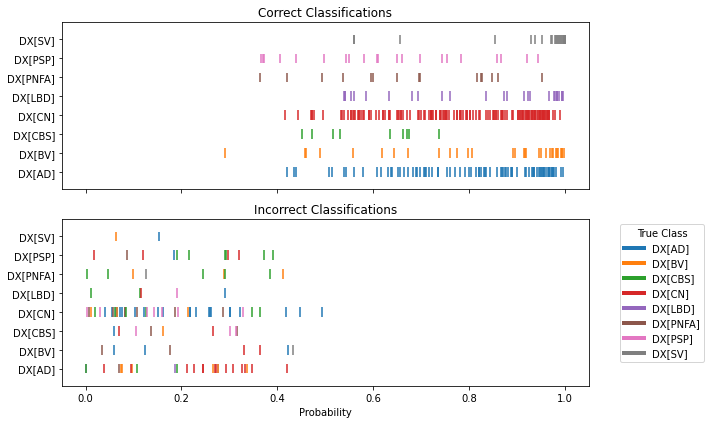

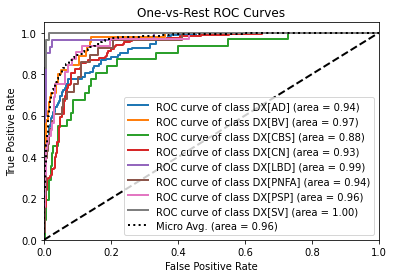

Optimal Thresholds: 
 {0: 0.417404354967873, 1: 0.06258539767400714, 2: 0.04646198959009511, 3: 0.47122353267418315, 4: 0.1865092927411772, 5: 0.05651541909393861, 6: 0.10538884921179914, 7: 0.12656386123598715}


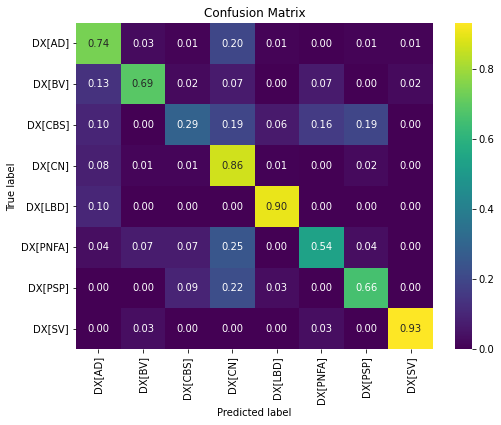

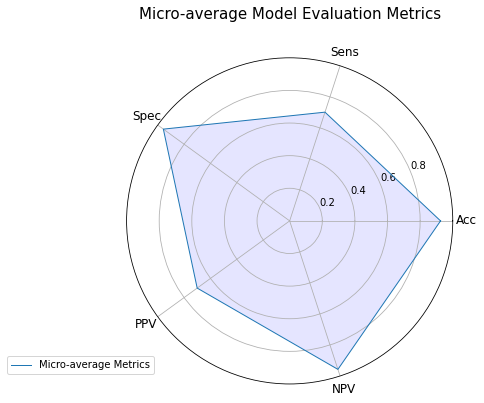

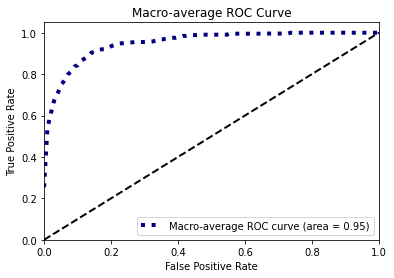

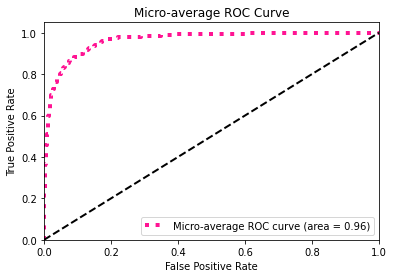

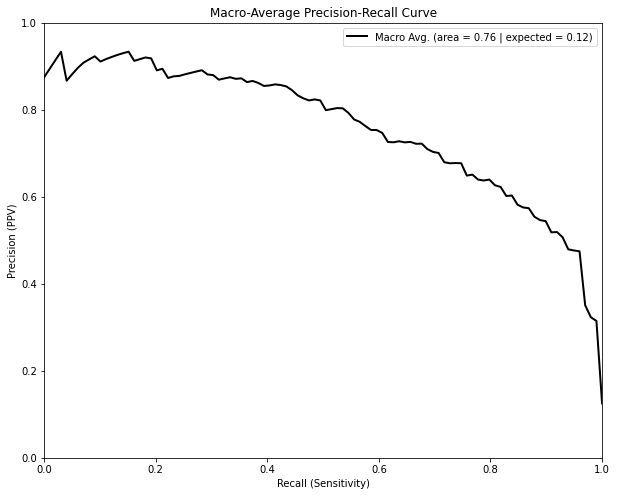

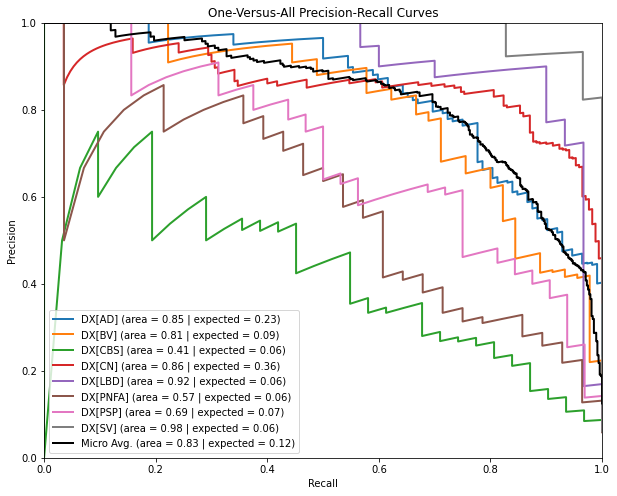

In [33]:
from calvin_utils.statistical_utils.classification_statistics import ComprehensiveMulticlassROC
evaluator = ComprehensiveMulticlassROC(fitted_model=results, observation_df=outcome_matrix, normalization='true', thresholds=None, out_dir=out_dir+'/train_results')
evaluator.run()

ADVANCED
- code specific manual thresholds to intervene upon classifications

Step 1: relate integer (index) to class

In [34]:
# evaluator.relate_index_to_class()

Step 2: in a dictionary of the indices (corresponding to class), key in the lambda function to edit the probability. 
- Code from left to right, giving priority to each method. 
- Example:
```
>thresholds = {
>            0: lambda probs: 0 if probs[0] > 0.5 else (1 if probs[0] > 0.25 else 2),  # Adjust class_0 predictions
>            1: lambda probs: None,  # No threshold adjustment for class_1
>            2: lambda probs: None   # No threshold adjustment for class_2
>        }
```

In [35]:
# thresholds = {
#     0: lambda prob: 0,  # Always keep class 0
#     1: lambda prob: 1,  # Always keep class 1
#     2: lambda prob: 2 if prob[2] > 0.5 else (1 if prob[1] > 0.3 else 0)  # Conditional adjustment for class 2
# }


Step 3: Check the effect

In [36]:
# from calvin_utils.statistical_utils.classification_statistics import ComprehensiveMulticlassROC
# evaluator = ComprehensiveMulticlassROC(fitted_model=results, observation_df=outcome_matrix, normalization='pred', thresholds=thresholds, out_dir=out_dir)
# evaluator.run()

Step 4: YOU MUST LOOCV AND VALIDATE IN OUT-OF-SAMPLE DATA.
- add thresholds as an argument to any further calls to ComprehensiveMulticlassROC

Bootstrap the Micro Average AUC

In [37]:
# import matplotlib
# from calvin_utils.statistical_utils.classification_statistics import bootstrap_auc
# matplotlib.use('Agg')  # Use a non-interactive backend

# mean_auc, lower_ci, upper_ci = bootstrap_auc(outcome_matrix, design_matrix, n_iterations=1000)
# print(f'Mean AUC: {mean_auc}, 95% CI: ({lower_ci}, {upper_ci})')

Permutation Test Two AUCs

In [38]:
data_df.columns

Index(['DX', 'subid', 'AD', 'SV', 'LBD', 'BV', 'PNFA', 'CBS', 'PSP', 'CN',
       'Peak_Values'],
      dtype='object')

In [39]:
# f1 = "Diagnosis ~ CerebellumCSF + ParietalCSF + MTLCSF + OccipitalCSF + FrontalCSF + temp_ins_csf + SubcortexCSF"
# f2 = "Diagnosis ~ CerebellumGM + ParietalGM + MTLGM + OccipitalGM + FrontalGM + temp_ins_gm + SubcortexGM"

In [40]:
# import matplotlib
# matplotlib.use('Agg')  # Use a non-interactive backend
# from calvin_utils.statistical_utils.classification_statistics import permute_auc_difference
# obs_diff, lower_ci, upper_ci, p_value = permute_auc_difference(data_df, formula1=f1, 
#                                                                   formula2=f2,
#                                                                   cal_palm=cal_palm, n_iterations=1000)
# print(f'Observde AUC Difference: {obs_diff}, 95% CI: ({lower_ci}, {upper_ci}), p-value: {p_value}')

# 06 - Visualize the Regression as a Forest Plot
- This will probably look poor if you ran a regression without standardizing your data. 

----Forest Plot For: DX[BV] ----
Saved to /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/barotono_disease_classification/metadata/dataset_6/forest_plots as regression_forest_plot.svg and .png
----Forest Plot For: DX[CBS] ----
Saved to /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/barotono_disease_classification/metadata/dataset_6/forest_plots as regression_forest_plot.svg and .png
----Forest Plot For: DX[CN] ----
Saved to /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/barotono_disease_classification/metadata/dataset_6/forest_plots as regression_forest_plot.svg and .png
----Forest Plot For: DX[LBD] ----
Saved to /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/barotono_disease_classification/metadata/dataset_6/forest_plots as regression_forest_plot.svg and .png
----Forest Plot For: DX[PNFA] ----
Saved to /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies

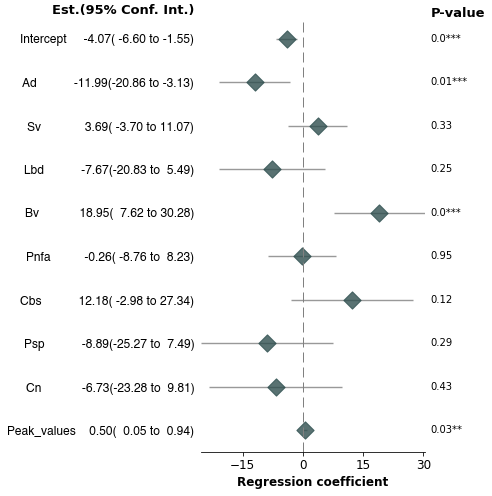

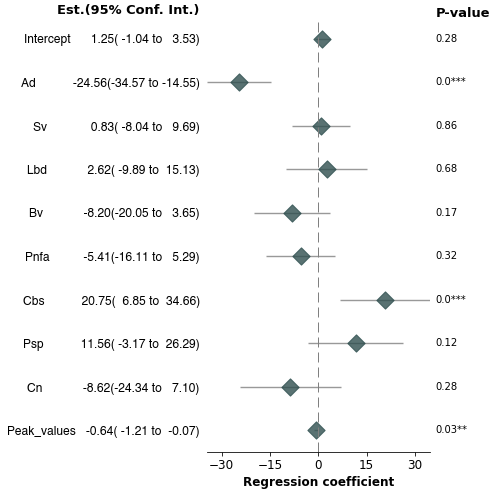

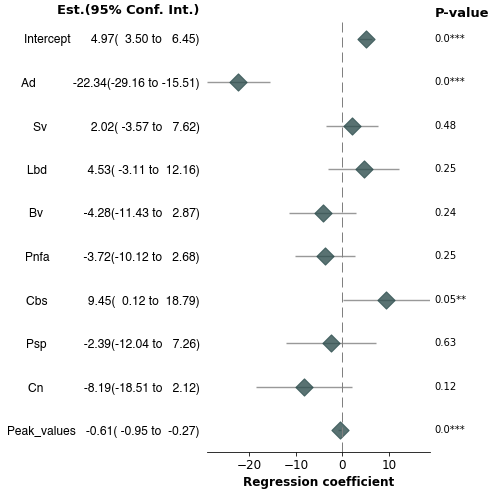

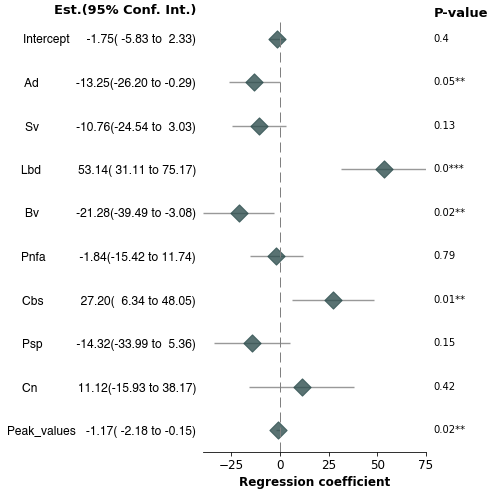

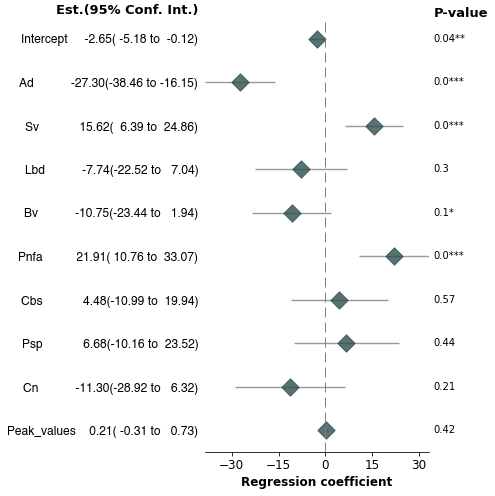

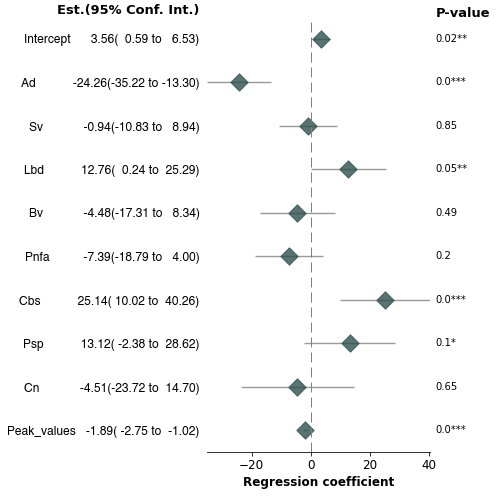

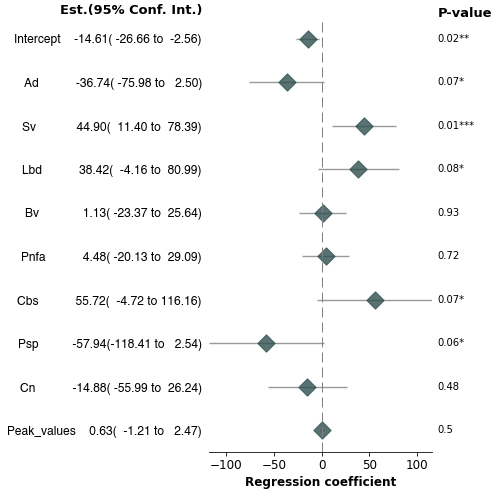

In [41]:
from calvin_utils.statistical_utils.statistical_measurements import MultinomialForestPlot

multinomial_forest = MultinomialForestPlot(model=results, sig_digits=2, out_dir=out_dir+'/forest_plots', table=False)
multinomial_forest.run()

# 07 - Generate Partial Dependence Plots

0:DX[AD]
1:DX[BV]
2:DX[CBS]
3:DX[CN]
4:DX[LBD]
5:DX[PNFA]
6:DX[PSP]
7:DX[SV]


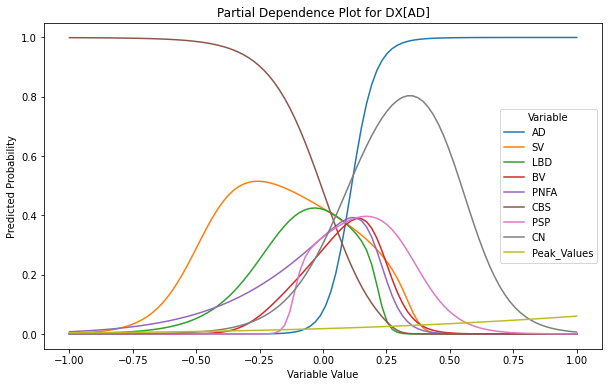

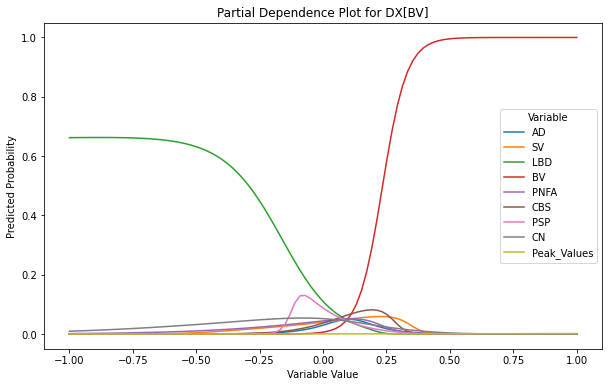

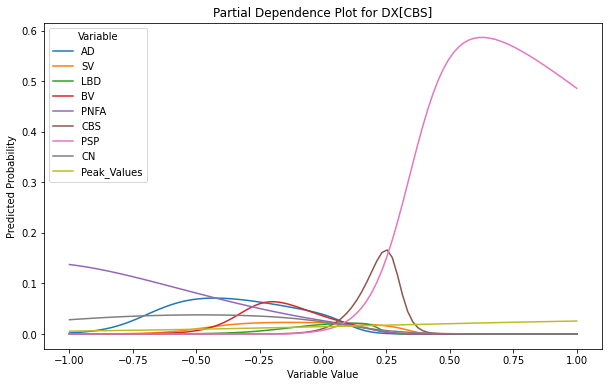

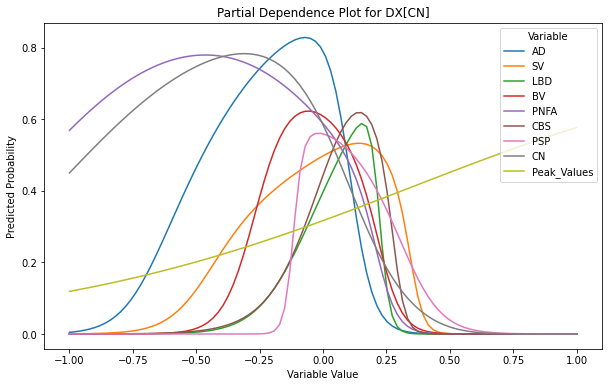

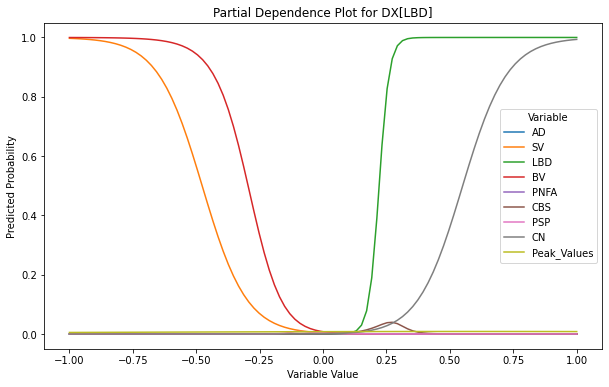

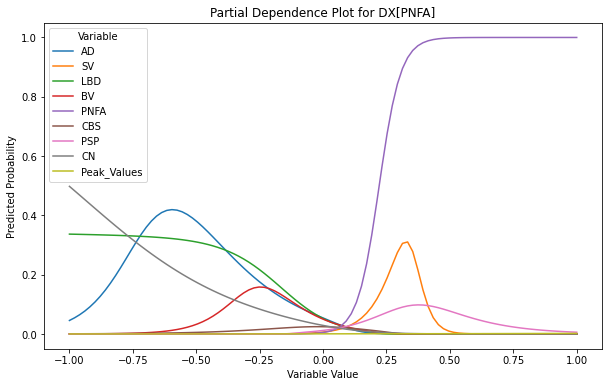

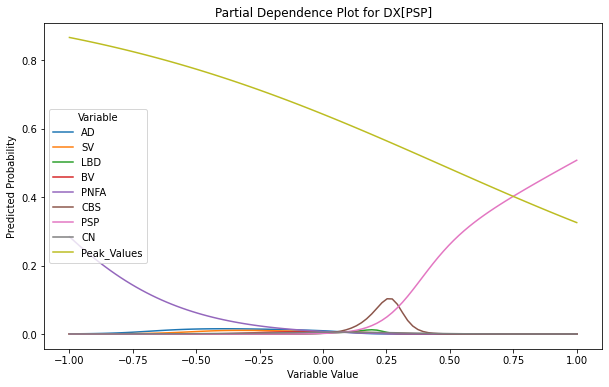

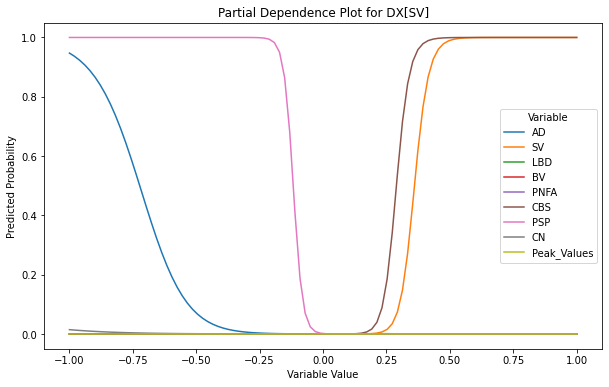

In [42]:
from calvin_utils.statistical_utils.statistical_measurements import PartialDependencePlot
pdp = PartialDependencePlot(formula=formula, data_df=data_df, model=results, design_matrix=design_matrix, outcomes_df=outcome_matrix, data_range=[-1,1], out_dir=out_dir+'/partial_dep_plots', marginal_method='mean', debug=False)
pdp.run()

# 08 - Visualize the Partial Regression Plots

Saved to /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/barotono_disease_classification/metadata/dataset_6/partial_regression_plot/partial_regression_plot.svg


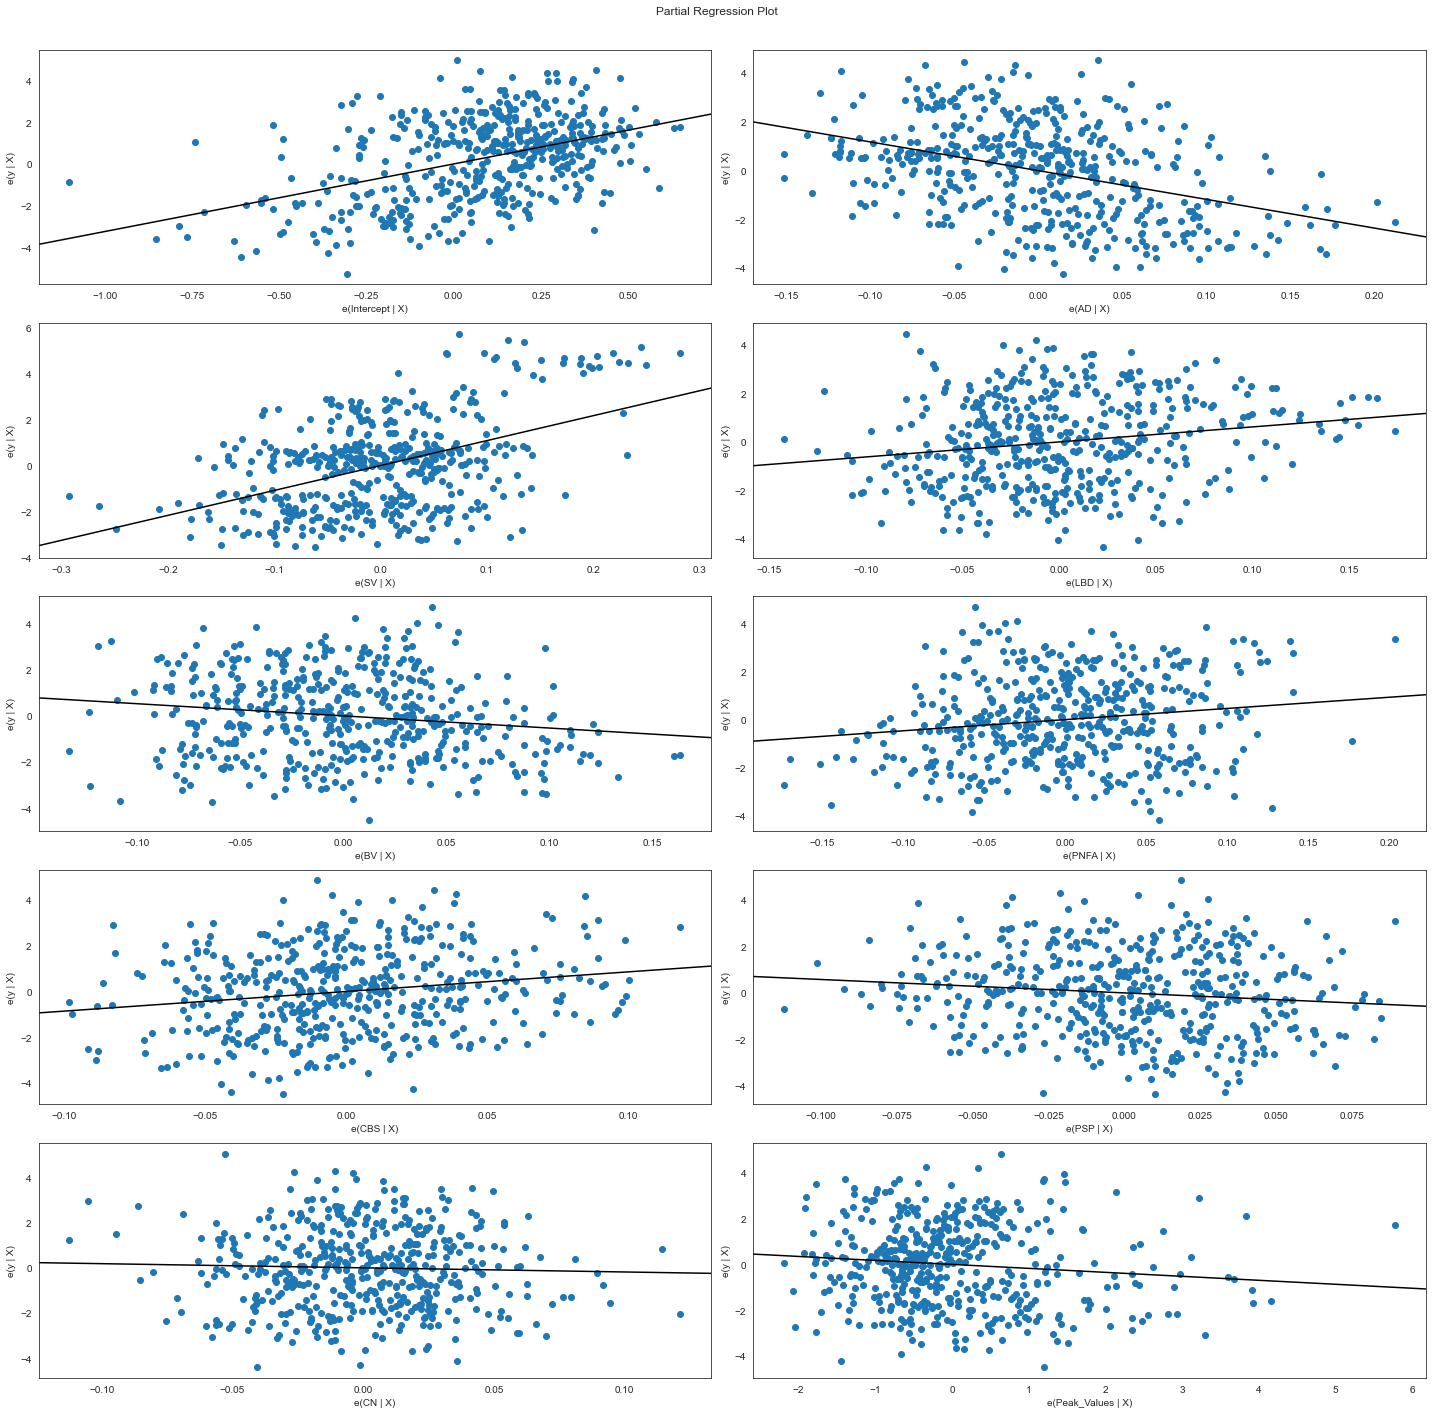

In [43]:
from calvin_utils.statistical_utils.statistical_measurements import PartialRegressionPlot
partial_plot = PartialRegressionPlot(model=results, design_matrix=design_matrix, out_dir=out_dir+'/partial_regression_plot', palette=None)
partial_plot = partial_plot.run()

# 09 - LOOCV

477it [00:15, 30.98it/s]


Taking maximum probability as prediction.
There are 112.0 observations for DX[AD]
There are 45.0 observations for DX[BV]
There are 31.0 observations for DX[CBS]
There are 170.0 observations for DX[CN]
There are 30.0 observations for DX[LBD]
There are 28.0 observations for DX[PNFA]
There are 32.0 observations for DX[PSP]
There are 29.0 observations for DX[SV]


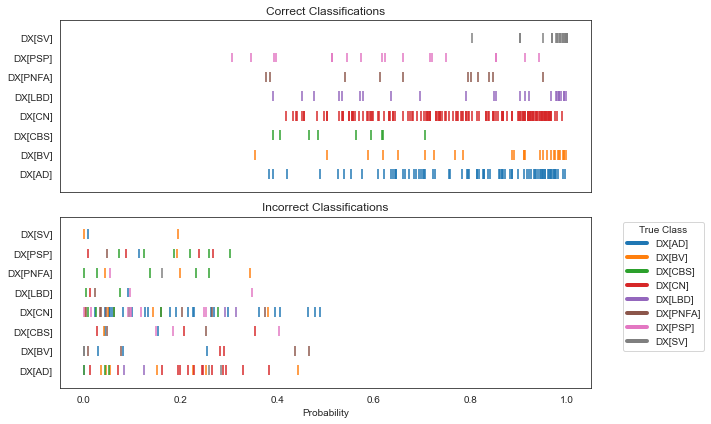

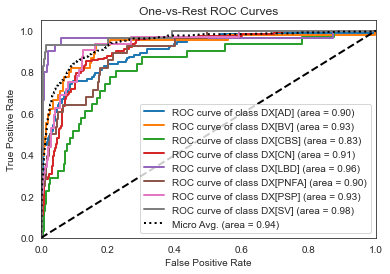

Optimal Thresholds: 
 {0: 0.3626612680440411, 1: 0.0423317507094766, 2: 0.044003530389374615, 3: 0.4321804881522925, 4: 0.08340488627312201, 5: 0.03329004652034908, 6: 0.09183925459293261, 7: 0.16186841728924253}


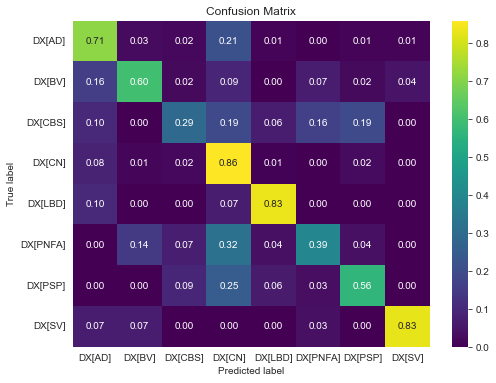

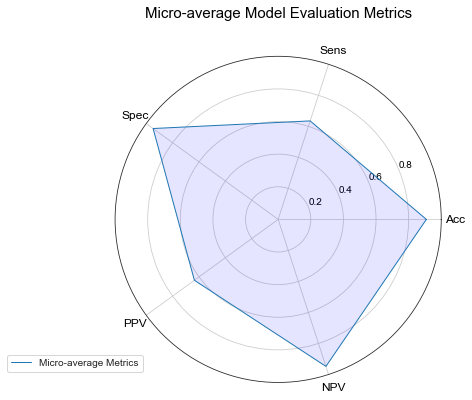

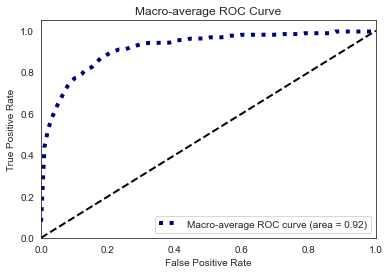

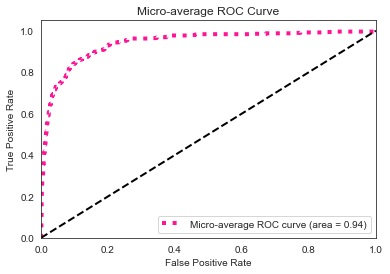

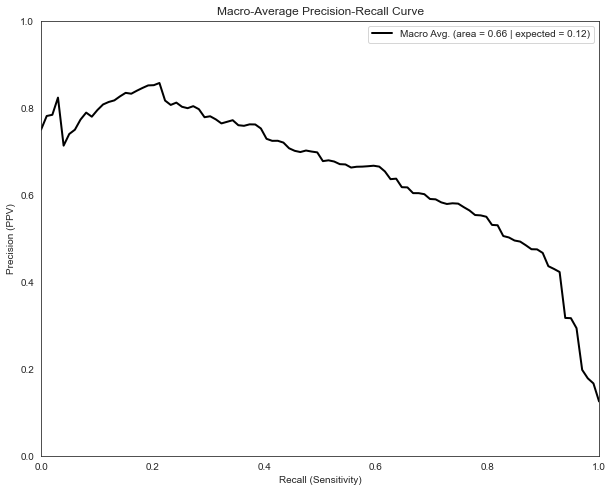

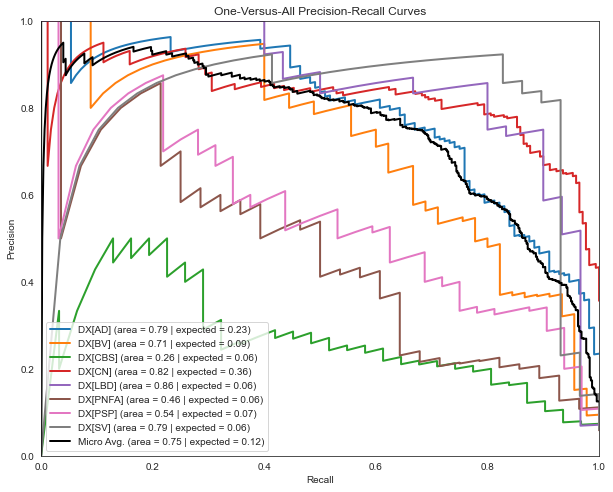

In [44]:
import pandas as pd
from calvin_utils.statistical_utils.logistic_regression import LogisticRegression
from calvin_utils.statistical_utils.classification_statistics import ComprehensiveMulticlassROC
y_true, y_pred, test_prob = LogisticRegression.run_loocv(outcome_matrix, design_matrix)
loocv_evaluator = ComprehensiveMulticlassROC(fitted_model=None, predictions_df=pd.DataFrame(test_prob, columns=outcome_matrix.columns), observation_df=outcome_matrix, normalization='true', thresholds=None, out_dir=out_dir+'/loocv_results')
loocv_evaluator.run()

# 10 - Predict Unseen Data

In [45]:
new_csv_path='/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/barotono_disease_classification/metadata/dataset_6/differential_diagnoses_test_jan10.csv'

Optional - Get New Data

In [46]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# # Instantiate the PalmPrepararation class
new_palm = CalvinStatsmodelsPalm(input_csv_path=new_csv_path, output_dir=out_dir+'/test_results', sheet=sheet)
# Call the process_nifti_paths method
other_df = new_palm.read_and_display_data()
other_df

,DX,subid,AD,SV,LBD,BV,PNFA,CBS,PSP,CN,Peak_Values
0,AD,003_S_5187,0.105065,-0.163977,-0.121078,-0.072121,0.088568,0.188778,-0.020847,0.133512,4.229827
1,AD,005_S_5119,0.304747,0.151812,0.129291,0.147603,0.007647,-0.027048,0.016932,0.127041,5.060092
2,AD,006_S_4153,0.296657,0.268457,-0.031304,-0.120097,-0.076581,-0.105002,-0.156144,-0.010260,5.256363
3,AD,009_S_5037,0.265873,0.246917,0.215087,0.142592,-0.007056,0.033291,0.128012,-0.027412,4.345522
4,AD,009_S_5252,0.274843,0.152793,0.332337,0.335721,0.076516,0.087219,0.204269,-0.000956,4.069436
...,...,...,...,...,...,...,...,...,...,...,...
117,CN,1_S_0287,0.011137,0.012862,-0.069732,-0.012159,-0.013539,-0.056139,-0.019900,0.048292,3.137433
118,CN,1_S_0299,0.011907,-0.029430,-0.061734,-0.055195,0.093134,0.067372,-0.042429,0.079797,3.197483
119,CN,1_S_0329,0.045867,0.037496,0.057151,0.145146,0.149163,0.062082,0.113210,0.032453,3.825414
120,CN,136_S_4433,-0.047110,-0.108067,-0.193436,-0.148504,-0.071928,-0.013961,-0.147820,0.010873,3.015902


In [47]:
# formula

In [48]:
# column_renaming_map = {
#                        'Mesial_Temporal': 'mesial_temporal_eh', 
#                        'parietal': 'parietal_eh', 
#                        'frontal': 'frontal_eh',
#                        'temporal': 'temporal_eh', 
#                        'ventricle':'ventricle_eh',
#                        'occipital': 'occipital_eh'}

In [49]:
# other_df.rename(columns=column_renaming_map, inplace=True)

Prepare Data

In [50]:
# Define the design matrix
# subset_df = other_df.groupby('DIAGNOSIS_BL').apply(lambda x: x.sample(min(len(x), 200))).reset_index(drop=True)
import pandas as pd
other_outcome_matrix, other_design_matrix = cal_palm.define_design_matrix(formula, other_df)

# Ensure both matrices have the same columns
if len(other_outcome_matrix.columns) != len(outcome_matrix.columns):
    # Create a zero-filled DataFrame with the same columns as outcome_matrix
    zero_df = pd.DataFrame(0, index=other_outcome_matrix.index, columns=outcome_matrix.columns)
    
    # Fill zero_df with values from other_outcome_matrix where columns exist
    common_columns = other_outcome_matrix.columns.intersection(outcome_matrix.columns)
    zero_df.loc[:, common_columns] = other_outcome_matrix.loc[:, common_columns]
    
    other_outcome_matrix = zero_df

other_design_matrix


,Intercept,AD,SV,LBD,BV,PNFA,CBS,PSP,CN,Peak_Values
0,1.0,0.105065,-0.163977,-0.121078,-0.072121,0.088568,0.188778,-0.020847,0.133512,4.229827
1,1.0,0.304747,0.151812,0.129291,0.147603,0.007647,-0.027048,0.016932,0.127041,5.060092
2,1.0,0.296657,0.268457,-0.031304,-0.120097,-0.076581,-0.105002,-0.156144,-0.010260,5.256363
3,1.0,0.265873,0.246917,0.215087,0.142592,-0.007056,0.033291,0.128012,-0.027412,4.345522
4,1.0,0.274843,0.152793,0.332337,0.335721,0.076516,0.087219,0.204269,-0.000956,4.069436
...,...,...,...,...,...,...,...,...,...,...
117,1.0,0.011137,0.012862,-0.069732,-0.012159,-0.013539,-0.056139,-0.019900,0.048292,3.137433
118,1.0,0.011907,-0.029430,-0.061734,-0.055195,0.093134,0.067372,-0.042429,0.079797,3.197483
119,1.0,0.045867,0.037496,0.057151,0.145146,0.149163,0.062082,0.113210,0.032453,3.825414
120,1.0,-0.047110,-0.108067,-0.193436,-0.148504,-0.071928,-0.013961,-0.147820,0.010873,3.015902


Predict

Evaluate

In [51]:
formula

'DX ~ AD + SV + LBD + BV + PNFA + CBS + PSP + CN + Peak_Values'

In [52]:
# thresholds = {
#     0: lambda prob: 0 if prob < 0.33 else 1,
#     1: lambda prob: 1 if prob > 0.33 else 0
# }

Taking maximum probability as prediction.
There are 28.0 observations for DX[AD]
There are 12.0 observations for DX[BV]
There are 8.0 observations for DX[CBS]
There are 41.0 observations for DX[CN]
There are 8.0 observations for DX[LBD]
There are 8.0 observations for DX[PNFA]
There are 9.0 observations for DX[PSP]
There are 8.0 observations for DX[SV]


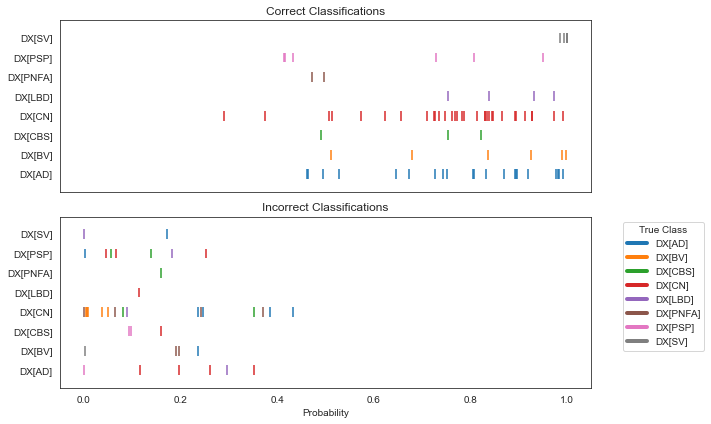

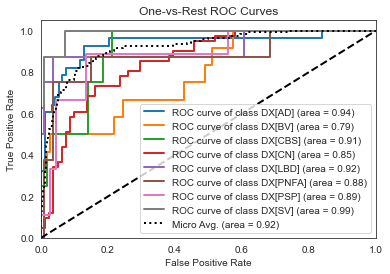

Optimal Thresholds: 
 {0: 0.23578672444508214, 1: 0.512354282170791, 2: 0.055748102511453596, 3: 0.5078649425145566, 4: 0.08867686523267662, 5: 0.06404791248354294, 6: 0.09434213188737431, 7: 0.0016659210162637695}


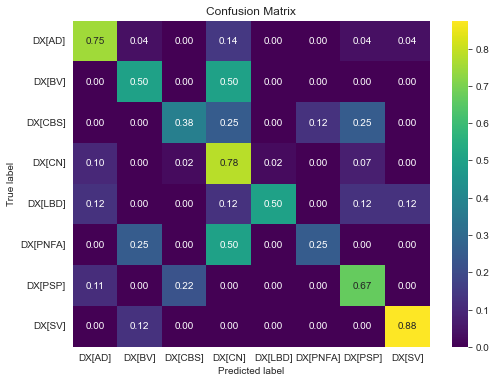

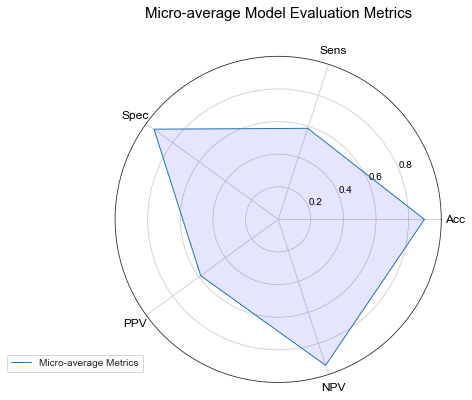

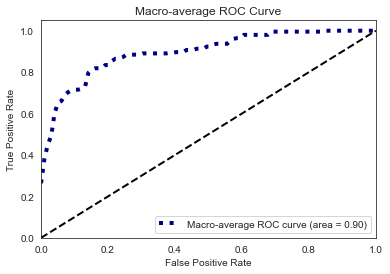

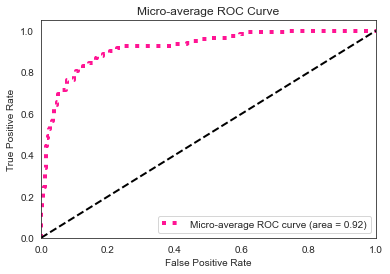

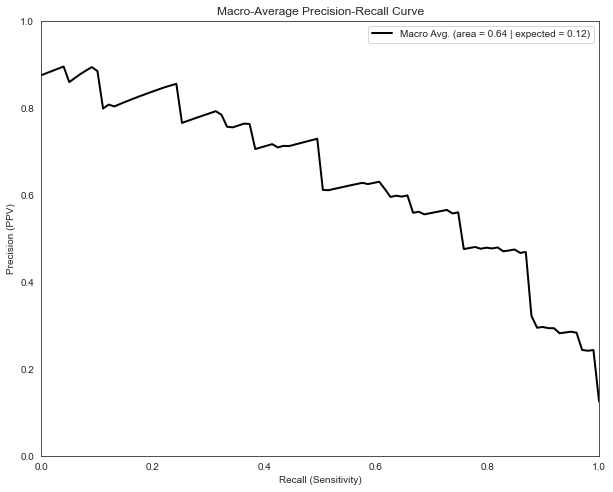

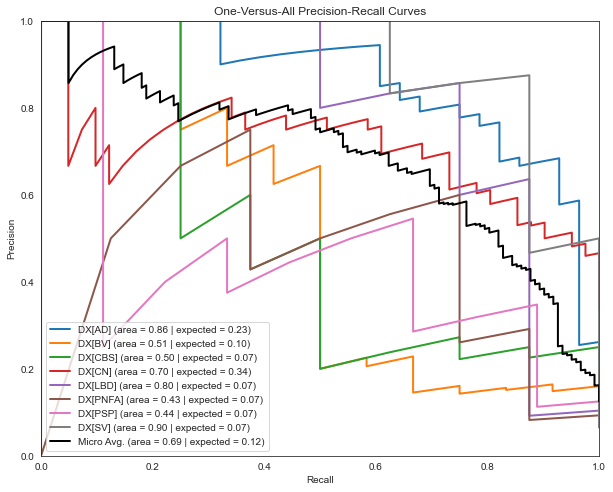

In [53]:
from calvin_utils.statistical_utils.classification_statistics import ComprehensiveMulticlassROC
loocv_evaluator = ComprehensiveMulticlassROC(fitted_model=None, predictions_df=results.predict(other_design_matrix), observation_df=other_outcome_matrix, normalization='true', thresholds=None, out_dir=out_dir+'/test_results')
loocv_evaluator.run() 

In [54]:
# results.predict(other_design_matrix)
loocv_evaluator.predictions_df.to_csv(out_dir+'/test_results/predicted_probabilities.csv')

Get One Vs. All Confidence Intervals on AUC

Done  DX[AD]
Done  DX[BV]
Done  DX[CBS]
Done  DX[CN]
Done  DX[LBD]
Done  DX[PNFA]
Done  DX[PSP]
Done  DX[SV]


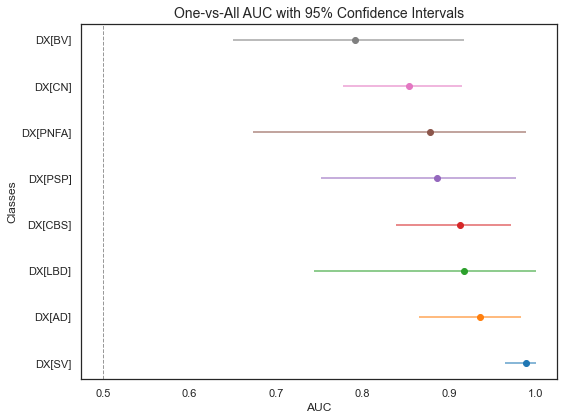

In [55]:
df, bootstrap = ComprehensiveMulticlassROC.bootstrap_ovr_auroc(raw_observations=loocv_evaluator.raw_observations, raw_predictions=loocv_evaluator.raw_predictions, outcome_matrix_cols=loocv_evaluator.outcome_matrix.columns)
ComprehensiveMulticlassROC.plot_ovr_auc_with_ci(df, out_dir=out_dir+'/test_auc_per_diagnosis')

In [56]:
display(df)

,Class,Mean AUROC,Std,lower_ci,upper_ci
0,DX[AD],0.935856,0.031448,0.865087,0.982982
1,DX[BV],0.791694,0.069038,0.650450,0.917322
2,DX[CBS],0.912471,0.034951,0.839304,0.971430
3,DX[CN],0.853227,0.034881,0.777715,0.914648
4,DX[LBD],0.917089,0.074082,0.743586,1.000000
5,DX[PNFA],0.878092,0.086877,0.673261,0.988513
6,DX[PSP],0.886583,0.061156,0.752142,0.977083
7,DX[SV],0.989032,0.010293,0.964091,1.000000


Get Confidence Intervals on Sensitivity, Specificity, NPV, PPV, and Accuracy for Each Class

In [57]:
out_dir

'/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/barotono_disease_classification/metadata/dataset_6'

--Optimal Threshold--
True Positives: 26
True Negatives: 82
False Positives: 12
False Negatives: 2


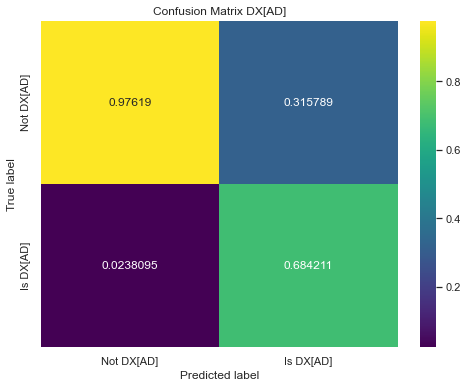

DX[AD]: 0.23578672444508214
True Positives: 6
True Negatives: 107
False Positives: 3
False Negatives: 6


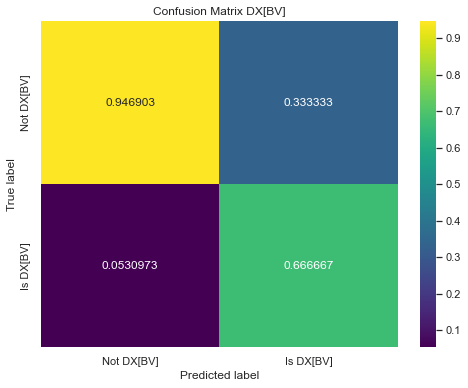

DX[BV]: 0.512354282170791
True Positives: 8
True Negatives: 90
False Positives: 24
False Negatives: 0


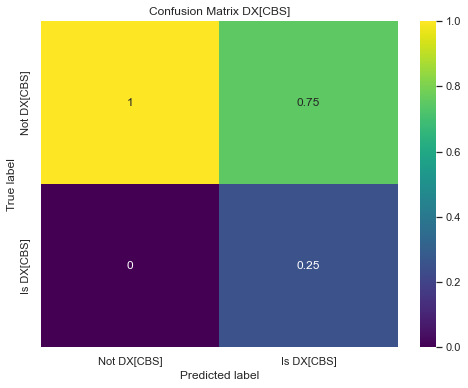

DX[CBS]: 0.055748102511453596
True Positives: 30
True Negatives: 68
False Positives: 13
False Negatives: 11


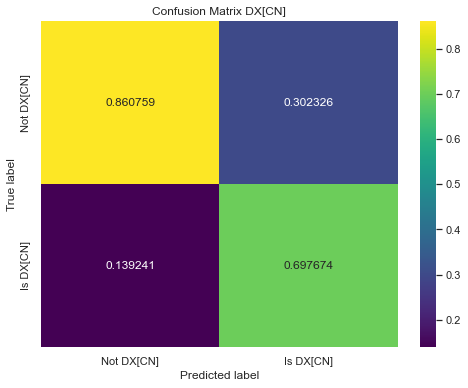

DX[CN]: 0.5078649425145566
True Positives: 7
True Negatives: 110
False Positives: 4
False Negatives: 1


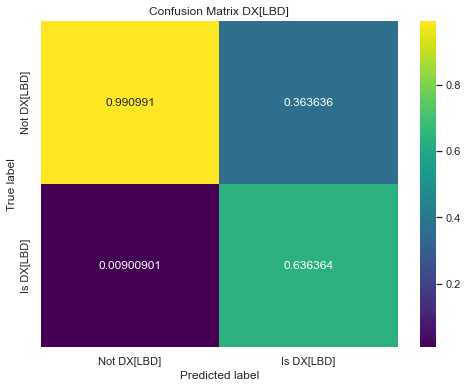

DX[LBD]: 0.08867686523267662
True Positives: 7
True Negatives: 97
False Positives: 17
False Negatives: 1


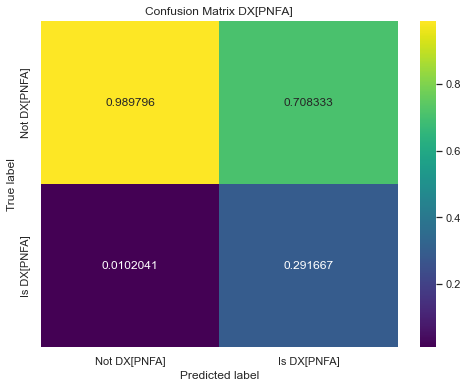

DX[PNFA]: 0.06404791248354294
True Positives: 8
True Negatives: 98
False Positives: 15
False Negatives: 1


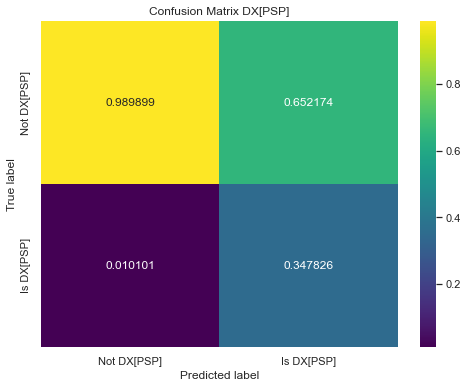

DX[PSP]: 0.09434213188737431
True Positives: 8
True Negatives: 106
False Positives: 8
False Negatives: 0


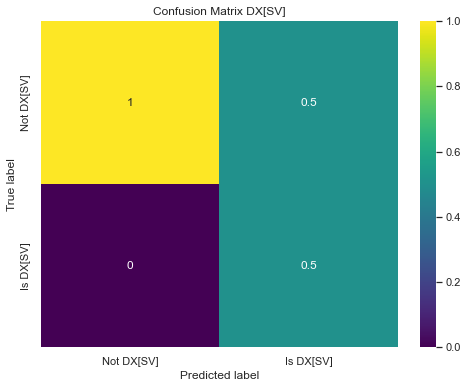

DX[SV]: 0.0016659210162637695


In [58]:
from calvin_utils.statistical_utils.classification_statistics import calculate_youden_and_metrics, save_dfs
dfs, youden_dict = calculate_youden_and_metrics(raw_observations=loocv_evaluator.raw_observations, 
                                                raw_predictions=loocv_evaluator.raw_predictions, 
                                                outcome_matrix_cols=loocv_evaluator.outcome_matrix.columns,
                                                out_dir=out_dir+'/metrics_per_diagnosis')
save_dfs(dfs, out_dir=out_dir+'/metrics_per_diagnosis')

In [59]:
dfs['DX[AD]']

,Mean,0.025%,0.975%
Metric,,,
Sensitivity,0.931193,0.815765,1.000000
Specificity,0.871213,0.804337,0.931034
NPV,0.977056,0.939741,1.000000
PPV,0.683119,0.531204,0.821481
Accuracy,0.885041,0.827869,0.942623


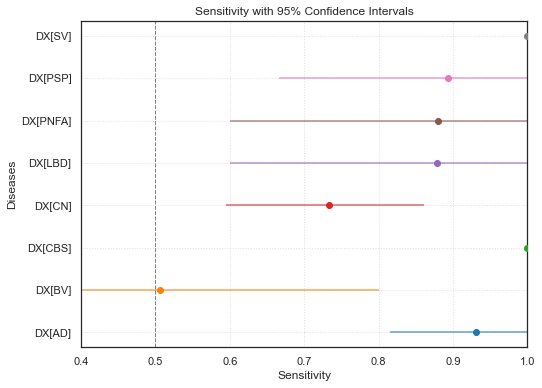

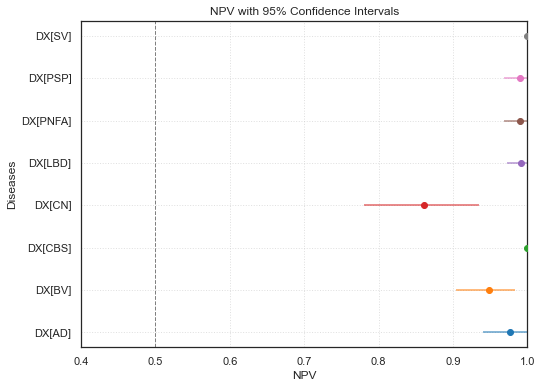

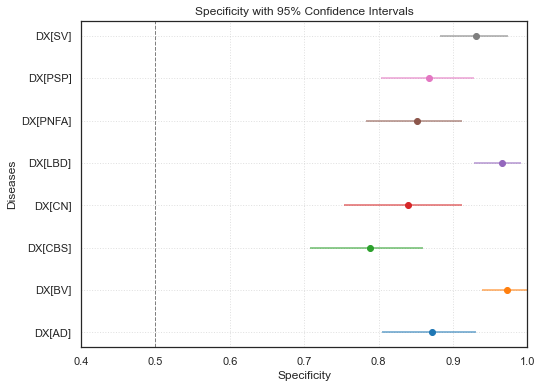

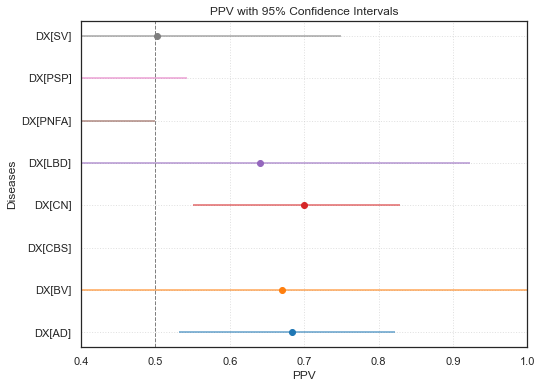

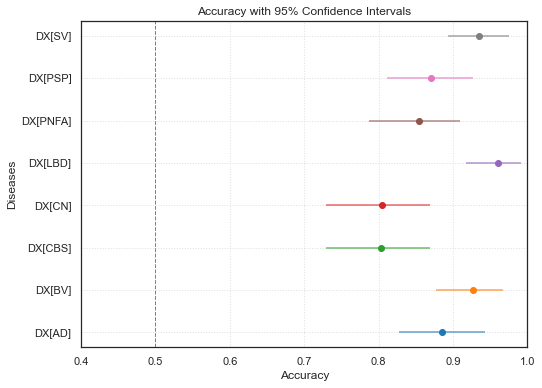

In [60]:
ComprehensiveMulticlassROC.generate_all_plots(dfs, out_dir=out_dir+'/metrics_per_diagnosis')

Get Overall Micro Average AUC

In [61]:
loocv_evaluator.get_micro_auc()

Taking maximum probability as prediction.
There are 28.0 observations for DX[AD]
There are 12.0 observations for DX[BV]
There are 8.0 observations for DX[CBS]
There are 41.0 observations for DX[CN]
There are 8.0 observations for DX[LBD]
There are 8.0 observations for DX[PNFA]
There are 9.0 observations for DX[PSP]
There are 8.0 observations for DX[SV]


0.9193189234844704

In [62]:

###----- Functionally Programmed Functions for Evaluation Using Above Classes -----##
'''
Hanging imports to facilitate easy transplant of code.
'''
import numpy as np
from calvin_utils.statistical_utils.classification_statistics import ComprehensiveMulticlassROC
from calvin_utils.statistical_utils.logistic_regression import LogisticRegression
import os
from contextlib import redirect_stdout, redirect_stderr
from tqdm import tqdm

def resample_df(data_df):
    n_samples = data_df.shape[0]
    # Shuffle the indices
    shuffled_indices = np.random.permutation(n_samples)
    # Reorder the DataFrame based on the shuffled indices but keep the original index
    shuffled_df = data_df.iloc[shuffled_indices].reset_index(drop=True).set_index(data_df.index)
    return shuffled_df

def permute_auc_difference(data_df, formula1, formula2, cal_palm, n_iterations=1000):
    auc_diffs = []
    for i in tqdm(range(n_iterations)):
        try:
            with open(os.devnull, 'w') as fnull, redirect_stdout(fnull), redirect_stderr(fnull):
                # Define design matrices and outcome matrices for both formulas
                outcome_matrix, design_matrix1 = cal_palm.define_design_matrix(formula1, data_df)
                _, design_matrix2 = cal_palm.define_design_matrix(formula2, data_df)
                
                # Permute the outcomes
                if i == 0:
                    resampled_df = outcome_matrix
                else:
                    resampled_df = resample_df(outcome_matrix)

                # Fit the logistic regression model for the first formula
                logreg1 = LogisticRegression(resampled_df, design_matrix1)
                results1 = logreg1.run()

                # Fit the logistic regression model for the second formula
                logreg2 = LogisticRegression(resampled_df, design_matrix2)
                results2 = logreg2.run()

                # Evaluate the models
                evaluator1 = ComprehensiveMulticlassROC(fitted_model=results1, observation_df=resampled_df, normalization='true', thresholds=None, out_dir=None)
                micro_auc1 = evaluator1.get_micro_auc()

                evaluator2 = ComprehensiveMulticlassROC(fitted_model=results2, observation_df=resampled_df, normalization='true', thresholds=None, out_dir=None)
                micro_auc2 = evaluator2.get_micro_auc()

                # Store the difference in micro-average AUCs
                if i == 0:
                    obs_diff = micro_auc1 - micro_auc2
                    print(f"F1: {micro_auc1} | F2: {micro_auc2}")
                else:
                    auc_diffs.append(micro_auc1 - micro_auc2)
            
        except Exception as e:
            print(e)
            continue
    # Calculate p-value based on the distribution of differences
    auc_diffs = np.array(auc_diffs)
    p_value = np.mean(auc_diffs >= obs_diff)

    # Calculate confidence intervals for the difference
    lower_ci = np.percentile(auc_diffs, 2.5)
    upper_ci = np.percentile(auc_diffs, 97.5)
    
    return obs_diff, lower_ci, upper_ci, p_value

def bootstrap_auc(outcome_matrix, design_matrix, n_iterations=1000, model=None):
    auc_scores = []
    n_samples = outcome_matrix.shape[0]
    
    for i in tqdm(range(n_iterations)):
        # Suppress both stdout and stderr
        try:
            with open(os.devnull, 'w') as fnull, redirect_stdout(fnull), redirect_stderr(fnull):
                # Generate a bootstrap sample
                resample_idx = np.random.choice(n_samples, size=n_samples, replace=True)
                outcome_matrix_resampled = outcome_matrix.iloc[resample_idx]
                design_matrix_resampled = design_matrix.iloc[resample_idx]

                # Fit the logistic regression model
                if model is None:
                    logreg = LogisticRegression(outcome_matrix_resampled, design_matrix_resampled)
                    results = logreg.run()
                    test = ComprehensiveMulticlassROC(fitted_model=results, observation_df=outcome_matrix_resampled, normalization='true', thresholds=None, out_dir=None)
                else:
                    results = model.predict(design_matrix_resampled)
                    test = ComprehensiveMulticlassROC(fitted_model=None, predictions_df=results, observation_df=outcome_matrix_resampled, normalization='true', thresholds=None, out_dir=None)
                # Evaluate the model
                micro_auc = test.get_micro_auc()
                auc_scores.append(micro_auc)
        except:
            continue
    # Calculate confidence intervals
    lower_ci = np.percentile(auc_scores, 2.5)
    upper_ci = np.percentile(auc_scores, 97.5)    
    return np.mean(auc_scores), lower_ci, upper_ci, auc_scores


Bootstrap the Micro Average AUC

In [63]:
import matplotlib
# from calvin_utils.statistical_utils.classification_statistics import bootstrap_auc
matplotlib.use('Agg')  # Use a non-interactive backend
mean_auc, lower_ci, upper_ci, auc_dist = bootstrap_auc(other_outcome_matrix, other_design_matrix, n_iterations=1000, model=results)
print(f'Mean AUC: {mean_auc}, 95% CI: ({lower_ci}, {upper_ci})')

100%|██████████| 1000/1000 [00:03<00:00, 300.01it/s]

Mean AUC: 0.9191347372058202, 95% CI: (0.8887388662801858, 0.9464069758513456)


In [64]:
import pandas as pd
auc_df = pd.DataFrame({'val':auc_dist})
auc_df.to_csv('/path/to/df.csv')

OSError: Cannot save file into a non-existent directory: '/path/to'

In [ ]:
auc_df = pd.read_csv('/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/Figures/diagnostic_ability/50fit_150pred/auc_dist.csv')

In [ ]:
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu

def compare_bootstrapped_means(distribution1, distribution2):
    """
    Compares two bootstrapped distributions using a two-sample t-test and Mann-Whitney U test.
    
    Parameters:
    - distribution1 (list or array): Bootstrapped distribution of group 1.
    - distribution2 (list or array): Bootstrapped distribution of group 2.
    
    Returns:
    - t_stat (float): t-statistic from the two-sample t-test.
    - t_p_value (float): p-value from the two-sample t-test.
    - u_stat (float): U-statistic from the Mann-Whitney U test.
    - u_p_value (float): p-value from the Mann-Whitney U test.
    """
    # Perform a two-sample t-test to compare means
    t_stat, t_p_value = ttest_ind(distribution1, distribution2)
    
    # Perform a Mann-Whitney U test to compare distributions
    u_stat, u_p_value = mannwhitneyu(distribution1, distribution2)

    return t_stat, t_p_value, u_stat, u_p_value

# Compare the distributions
t_stat, t_p_value, u_stat, u_p_value = compare_bootstrapped_means(auc_df['CSF AUCs'], auc_df['CTh AUCs'])

print(f"Two-sample t-test: t-stat = {t_stat:.4f}, p-value = {t_p_value:.4f}")
print(f"Mann-Whitney U test: U-stat = {u_stat:.4f}, p-value = {u_p_value:.4f}")


Plot Bootstraps

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_custom_bootstrap_auc(df):
    """
    Plots the mean and error bars of AUCs for each column in the DataFrame using Seaborn and Matplotlib,
    styled similarly to the reference plot.
    
    Parameters:
    - df (pd.DataFrame): DataFrame containing bootstrapped AUC distributions. 
                         Each column represents a different group.
    """
    # Initialize lists to store plotting data
    means = []
    lower_errors = []
    upper_errors = []
    y_labels = []

    # Calculate mean and confidence intervals for each column in the DataFrame, ignoring NaNs
    for column in df.columns:
        bootstrapped_values = df[column].dropna()  # Remove NaN values
        if len(bootstrapped_values) > 0:
            mean_value = np.mean(bootstrapped_values)
            lower_ci = np.percentile(bootstrapped_values, 2.5)
            upper_ci = np.percentile(bootstrapped_values, 97.5)
            
            means.append(mean_value)
            lower_errors.append(mean_value - lower_ci)
            upper_errors.append(upper_ci - mean_value)
            y_labels.append(column)

    # Create a horizontal scatter plot with error bars
    plt.figure(figsize=(6, len(means) * 1.2))  # Adjust height based on number of groups
    sns.set(style="whitegrid")
    
    # Assign colors from a color palette
    palette = sns.color_palette("tab10", len(means))

    # Plot the means as points with error bars
    for i, (mean, lower_err, upper_err, label) in enumerate(zip(means, lower_errors, upper_errors, y_labels)):
        plt.errorbar(x=mean, y=i, xerr=[[lower_err], [upper_err]], fmt='o', color=palette[i], capsize=5, markersize=10)
    
    # Customize y-ticks to match labels
    plt.yticks(range(len(y_labels)), y_labels)
    
    # Labels and title
    plt.xlabel('AUC')
    plt.ylabel('CAD Product')
    plt.title('Mean AUC with 95% CI for CAD Products')

    # Customize the grid and layout
    plt.grid(False)
    plt.xlim(0.4, 1.0)  # Set x-axis limits for AUC

    # Display the plot
    plt.tight_layout()
    plt.show()
    plt.savefig(out_dir + '/95ci.svg')

plot_custom_bootstrap_auc(auc_df)

Permutation Test Two AUCs

In [ ]:
other_df.columns

In [ ]:
f1 = "Diagnosis ~ CSF_Frontal + CSF_Temporal + CSF_Parietal + CSF_Occipital + CSF_MTL + CSF_Cerebellum + CSF_Subcortex"
f2 = "Diagnosis ~ GM_Frontal + GM_Temporal + GM_Parietal + GM_Occipital + GM_MTL + GM_Cerebellum + GM_Subcortex"

In [ ]:
# from calvin_utils.statistical_utils.classification_statistics import permute_auc_difference
obs_diff, lower_ci, upper_ci, p_value = permute_auc_difference(other_df, formula1=f1, 
                                                                  formula2=f2,
                                                                  cal_palm=cal_palm, n_iterations=1000)
print(f'Observed AUC Difference: {obs_diff}, 95% CI: ({lower_ci}, {upper_ci}), p-value: {p_value}')